In [221]:
%matplotlib notebook 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math

from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
import matplotlib.pyplot as plt

# SectionA - 2D Pose

Question 1

In [222]:
R1 = rot2(-50, 'deg')
print(R1)

[[ 0.64278761  0.76604444]
 [-0.76604444  0.64278761]]


Question 2

In [223]:
T1 = transl2(3,4)
print(T1)

[[1. 0. 3.]
 [0. 1. 4.]
 [0. 0. 1.]]


Question 3

In [225]:
T2 = trot2(-30,unit='deg',t=[5,6])
print(T2)

[[ 0.8660254  0.5        5.       ]
 [-0.5        0.8660254  6.       ]
 [ 0.         0.         1.       ]]


Question 4

In [226]:
PA_0 = np.array([[8],[9]])
print(PA_0)
PA_2 = np.matmul(trinv2(T2),e2h(PA_0))
print(PA_2)

[[8]
 [9]]
[1.09807621 4.09807621 1.        ]


Question 5

In [227]:
PB_2 = np.array([[10],[10]])
PB_0 = np.matmul(T2,e2h(PB_2))
print(PB_0)
PB_1 = np.matmul(trinv2(T1),PB_0)
print(PB_1)

[18.66025404  9.66025404  1.        ]
[15.66025404  5.66025404  1.        ]


Question 6

In [228]:
P = e2h(PA_0)-PB_0
D_AB = math.hypot(P[0],P[1])
print(D_AB)

10.680681230420996


# Section B - 3D Pose

In [117]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

Question 1

In [218]:
T = trotx(45, 'deg', t=[1,1,3])
print(T)
T1 = troty(30, 'deg', t=[0,0,0])
print(T1)

[[ 1.          0.          0.          1.        ]
 [ 0.          0.70710678 -0.70710678  1.        ]
 [ 0.          0.70710678  0.70710678  3.        ]
 [ 0.          0.          0.          1.        ]]
[[ 0.8660254  0.         0.5        0.       ]
 [ 0.         1.         0.         0.       ]
 [-0.5        0.         0.8660254  0.       ]
 [ 0.         0.         0.         1.       ]]


<IPython.core.display.Javascript object>


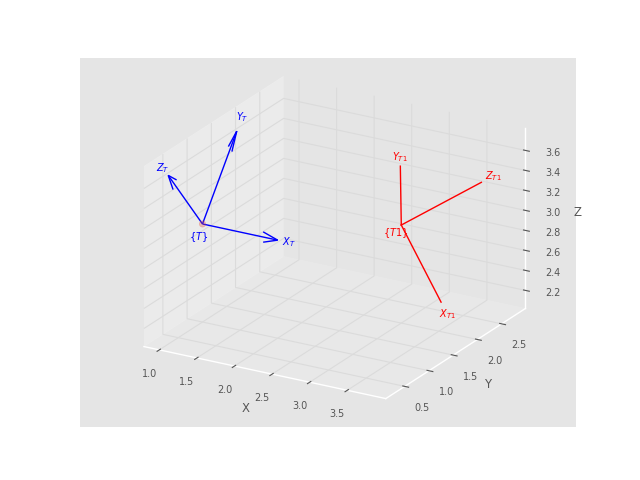

In [114]:
fig = plt.figure()
trplot(T, frame='T', color='blue', arrow=True, axes=None)
trplot(T1, frame='T1', color='red', arrow=False, axes=None)

Question 2

In [110]:
T0 = np.eye(4)
print(T0)
T3 = transl(3,2,3)@rpy2tr(30,60,60, unit='deg')
print(T1)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[ 0.25       -0.53349365  0.8080127   3.        ]
 [ 0.4330127   0.8080127   0.39951905  2.        ]
 [-0.8660254   0.25        0.4330127   3.        ]
 [ 0.          0.          0.          1.        ]]


<IPython.core.display.Javascript object>


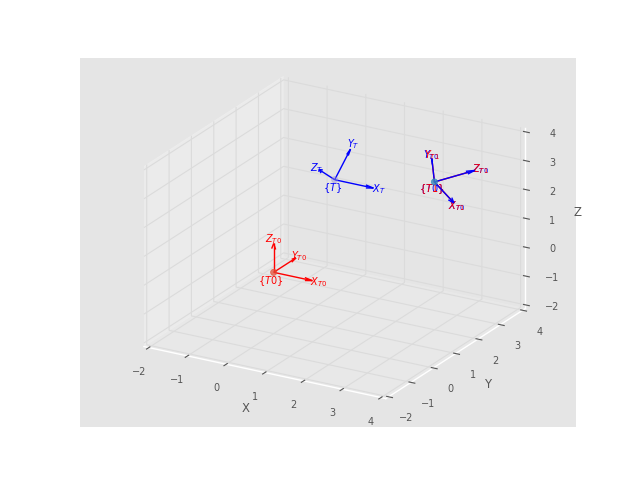

In [107]:
trplot(T0, frame='T0', color='red', arrow=True, dims=[-2,4])
trplot(T3, frame='T0', color='blue', arrow=True, dims=[-2,4])

In [105]:
tranimate(T0@T3, frame='A', arrow=False, dims=[0,5])

KeyboardInterrupt: 

Question 3

In [219]:
#a
M = np.array([[-2, 2, 2, -2, -2, 2, 2, -2], [-2, -2, 2, 2, -2, -2, 2, 2], [-2, -2, -2, -2, 2, 2, 2, 2]])

<IPython.core.display.Javascript object>


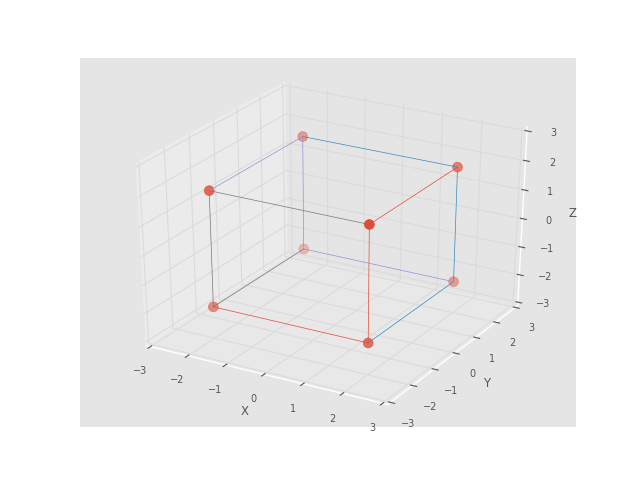

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=M[0], ys=M[1], zs=M[2], s=50)  

In [174]:
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]] 

ax.set_xlim3d(-3,3); ax.set_ylim3d(-3,3); ax.set_zlim3d(-3,3);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');

from IPython import display
import time

for line in lines:
    ax.plot([M[0,i] for i in line], [M[1,i] for i in line], [M[2,i] for i in line]) 
    fig.canvas.draw() 
    time.sleep(1)     

In [167]:
#b
T = SE3.Rx(30,unit='deg')
print(T)
Q = T * M
print(Q)

   1           0           0           0            
   0           0.866025   -0.5         0            
   0           0.5         0.866025    0            
   0           0           0           1            

[[-2.          2.          2.         -2.         -2.          2.
   2.         -2.        ]
 [-0.73205081 -0.73205081  2.73205081  2.73205081 -2.73205081 -2.73205081
   0.73205081  0.73205081]
 [-2.73205081 -2.73205081 -0.73205081 -0.73205081  0.73205081  0.73205081
   2.73205081  2.73205081]]


<IPython.core.display.Javascript object>


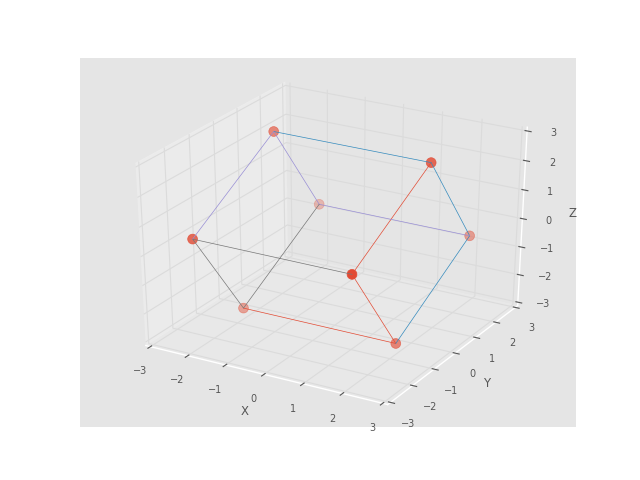

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=50)  

In [176]:
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]] 

ax.set_xlim3d(-3,3); ax.set_ylim3d(-3,3); ax.set_zlim3d(-3,3);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');

from IPython import display
import time

for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line]) 
    fig.canvas.draw() 
    time.sleep(1)     

Question 4

<IPython.core.display.Javascript object>


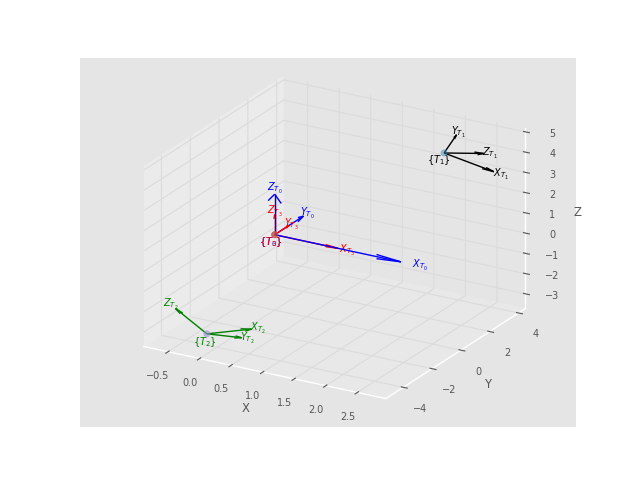

In [209]:
fig = plt.figure()
T_0 = eye(4)
trplot(T_0, frame='T_0', color='blue', arrow=True, length=2)
T_1 = transl(2,3,4)@trotx(30,unit='deg')@troty(45,unit='deg')
trplot(T_1, frame='T_1', color='black', arrow=True, length=1)
T_2 = np.linalg.inv(T_1)
trplot(T_2, frame='T_2', color='green', arrow=True, length=1)
T_3 = T_1 @ T_2
trplot(T_3, frame='T_3', color='red', arrow=True, length=1)

Question 5

In [216]:
class Quaternion:
    def _init_(self, s, x, y, z):
        self.s = s
        self.x = x
        self.y = y
        self.z = z
        self.vector = [x, y, z]
        self.all = [s, x, y, z]
    def _add_(self, quater):
        q = self.all.copy()
        for i in range[4]:
            q[i] += quater.all[i]
        return Quaternion(q[0], q[1], q[2], q[3])
    def _sub_(self, quater):
        q = self.all.copy()
        for i in range[4]:
            q[i] -= quater.all[i]
        return Quaternion(q[0], q[1], q[2], q[3])
    def _mul_(self, quater):
        q = self.all.copy()
        p = quater.all.copy()
        s = q[0]*p[0]-q[1]*p[1]-q[2]*p[2]-q[2]*p[3]
        x = q[0]*p[1]+q[1]*p[0]+q[2]*p[3]-q[3]*p[2]
        y = q[0]*p[2]-q[1]*p[3]+q[2]*p[0]+q[3]*p[1]
        z = q[0]*p[3]+q[1]*p[2]-q[2]*p[1]+q[3]*p[0]
        return Quaternion(s, x, y, z)
    def inverse(self):
        q = self.all.copy()
        mod = self.modpow()
        for i in range(4):
            q[i] /= mod
        return Quaternion(q[0], -q[1], -q[2], -q[3])
    def negative(self):
        q = self.all.copy()
        for i in range(4):
            q[i] = -q[i]
        return Quaternion(q[0], q[1], q[2], q[3])
    